# ДИПЛОМНЫЙ ПРОЕКТ "Модель прогнозирования стоимости жилья для агенства недвижимости"

# АНАЛИЗ ДАНННЫХ

## 1. ПОДГРУЗКА ДАННЫХ И НЕОБХОДИМЫХ БИБЛИОТЕК  И ДАТАСЕТА

In [140]:
import pandas as pd


import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from itertools import chain


In [95]:
df= pd.read_csv('data/cleaned_data.csv')
df.head()

,status,propertyType,street,baths,fireplace,city,sqft,zipcode,state,PrivatePool,target,Year built,Heating,Cooling,Parking,school_rating _mean,school_dist_min
0,auction,single_family_home,240 heather ln,4.0,True,southern pines,2900,28387,NC,False,418000,2019,True,False,False,5.2,2.70
1,for sale,single_family_home,12911 e heroy ave,3.0,False,spokane valley,1947,99216,WA,False,310000,2019,False,False,False,4.0,1.01
2,for sale,single_family_home,2005 westridge rd,2.0,True,los angeles,3000,90049,CA,True,2895000,1961,True,True,True,6.7,1.19
3,for sale,single_family_home,4311 livingston ave,8.0,True,dallas,6457,75205,TX,False,2395000,2006,True,True,True,5.6,0.10
4,for sale,land,1524 kiscoe st,0.0,False,palm bay,0,32908,FL,False,5000,no info,False,False,False,4.7,3.03


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373752 entries, 0 to 373751
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   status               373752 non-null  object 
 1   propertyType         373752 non-null  object 
 2   street               373752 non-null  object 
 3   baths                373752 non-null  float64
 4   fireplace            373752 non-null  bool   
 5   city                 373752 non-null  object 
 6   sqft                 373752 non-null  int64  
 7   zipcode              373752 non-null  object 
 8   state                373752 non-null  object 
 9   PrivatePool          373752 non-null  bool   
 10  target               373752 non-null  int64  
 11  Year built           373752 non-null  object 
 12  Heating              373752 non-null  bool   
 13  Cooling              373752 non-null  bool   
 14  Parking              373752 non-null  bool   
 15  school_rating _me

У нас присутствуют булевые, числовые, и категориальные признаки. Составим списки признаков по типу данных:

In [97]:
digital_features = ['baths', 'sqft', 'target', 'school_rating _mean', 'school_dist_min']

binar_features = ['fireplace', 'PrivatePool', 'Heating', 'Cooling', 'Parking']

categorial_features = ['status', 'propertyType', 'street', 'city', 'zipcode', 'state', 'Year built']


## 2.АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ

Посмотрим на выбросы в числовых признаках:

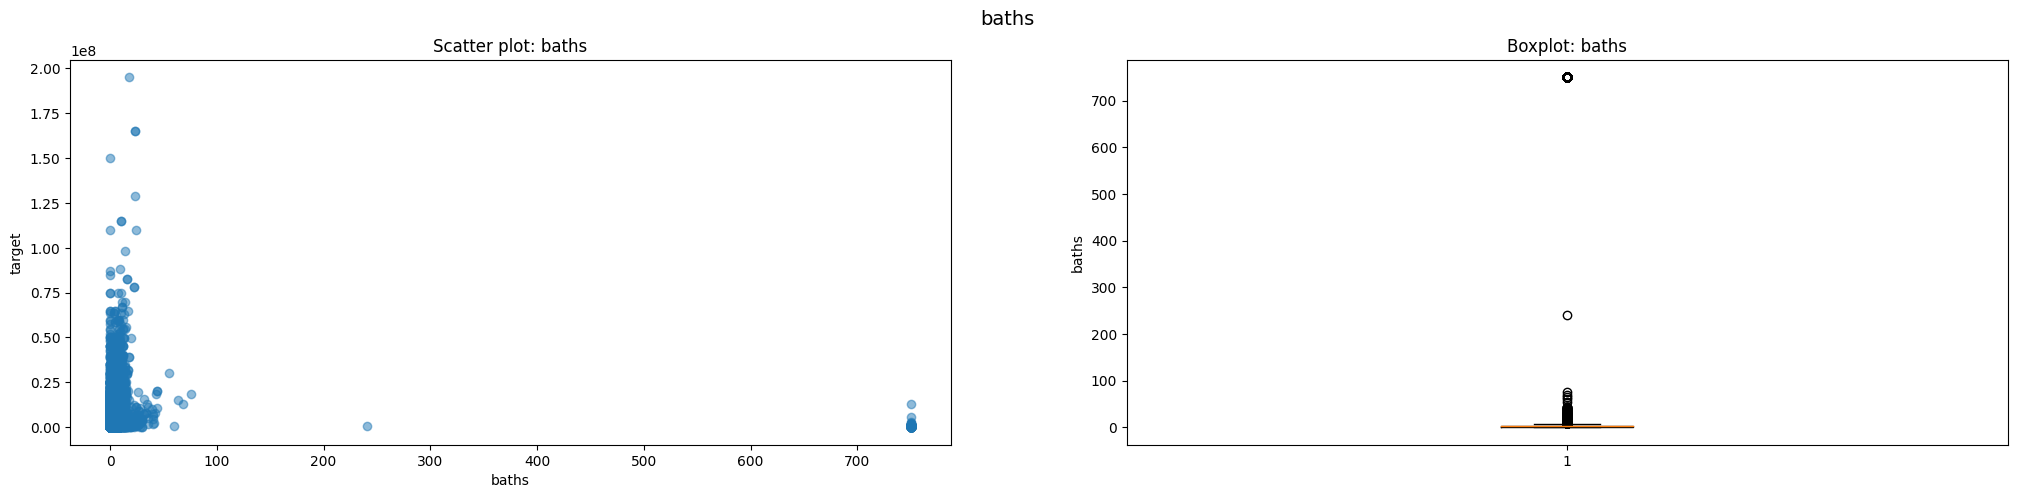

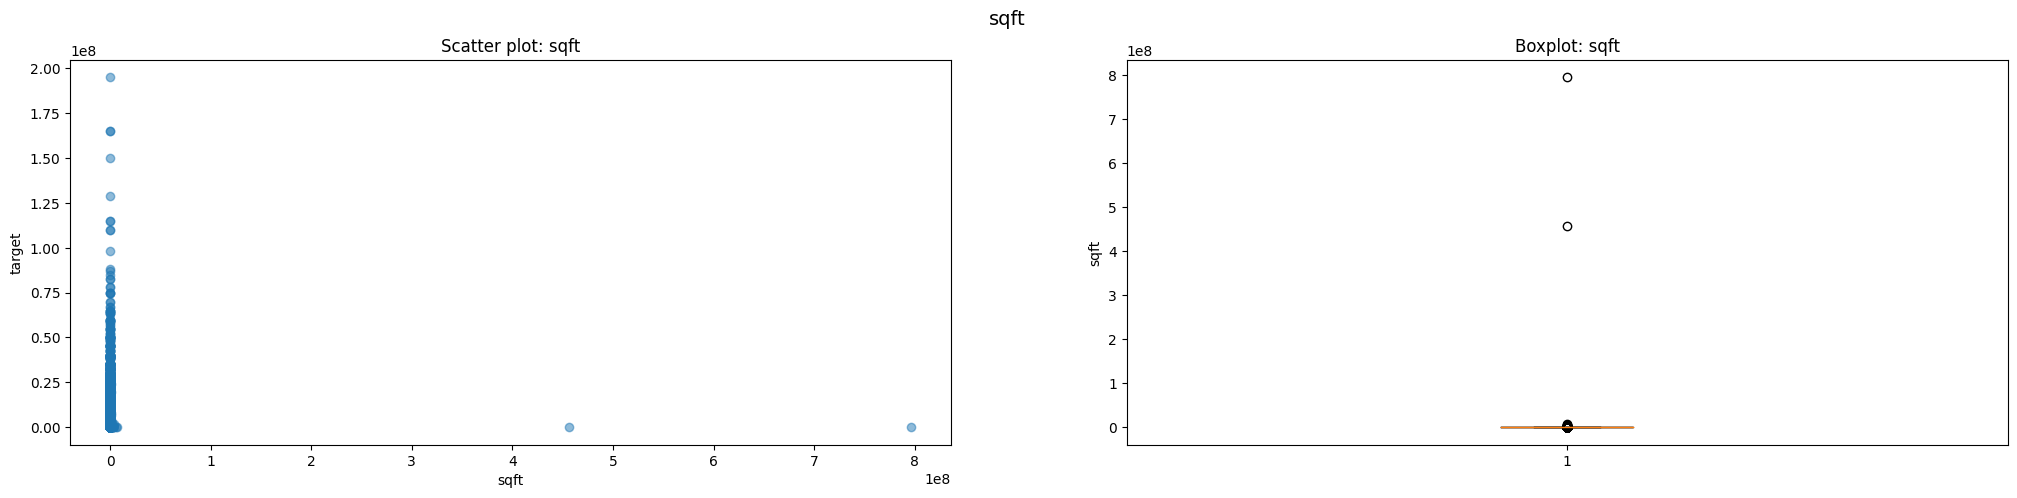

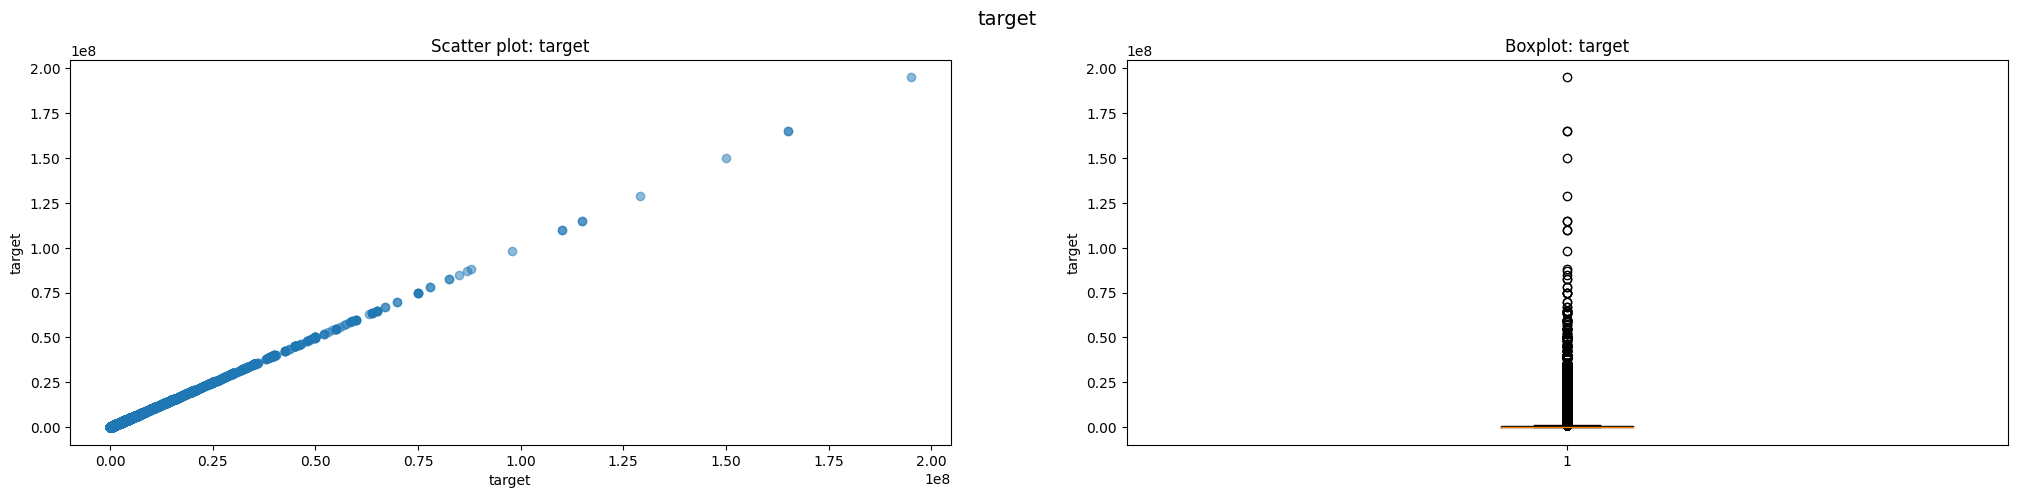

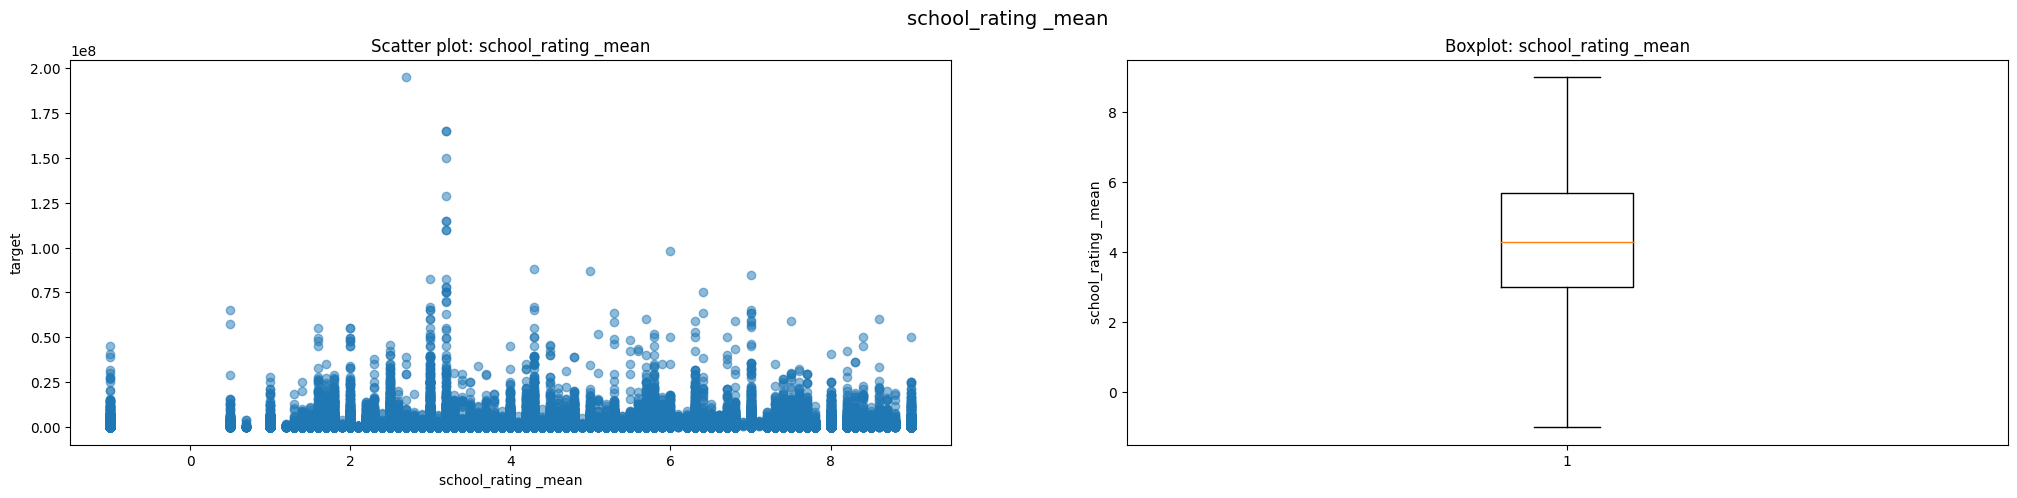

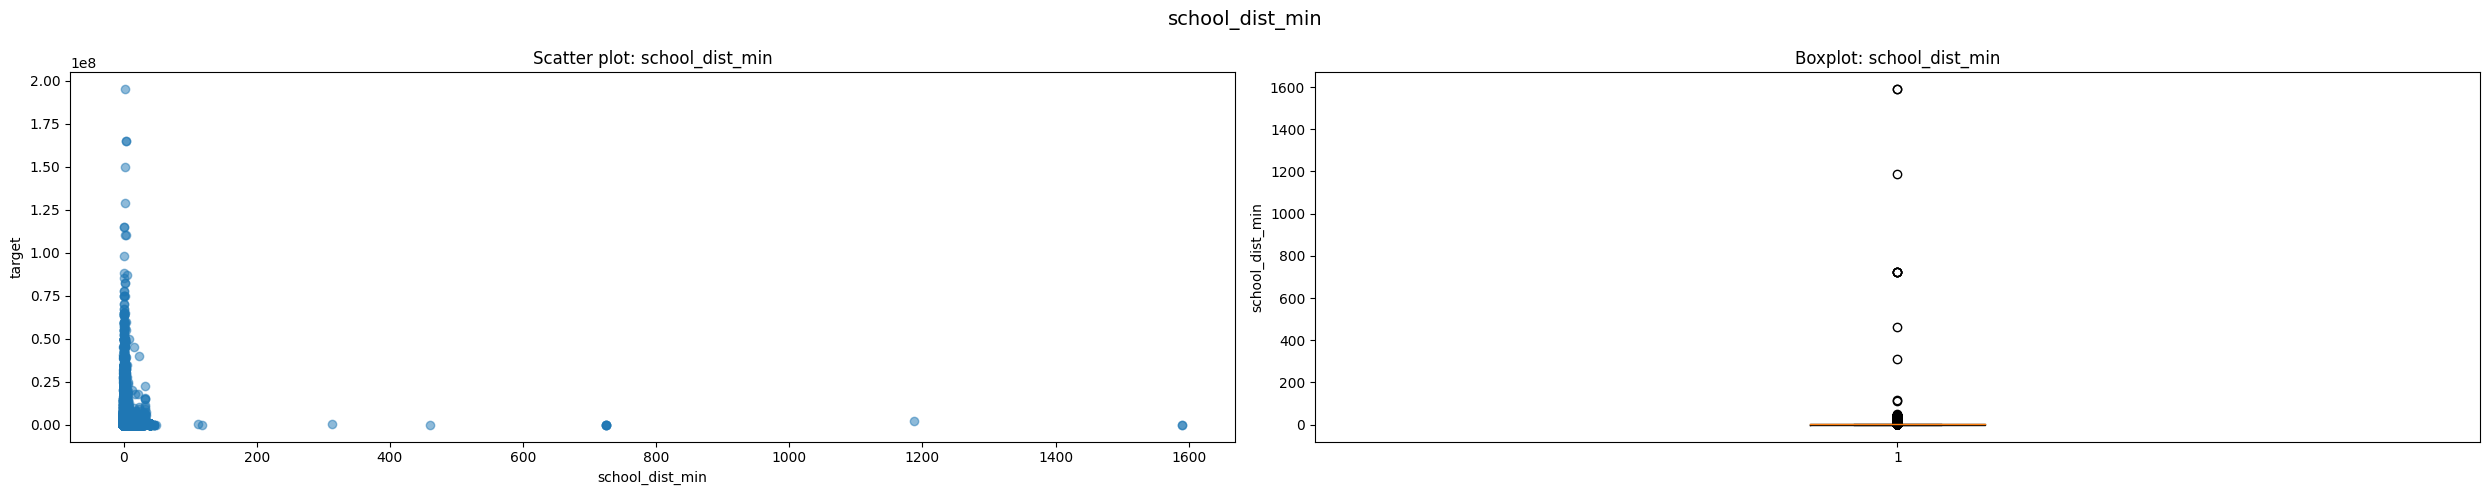

In [5]:
for feature in digital_features:
    fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(25, 5)) 
    fig.suptitle(f'{feature}', fontsize=14)
      
    barplot.scatter(df[feature], df['target'], alpha=0.5)
    barplot.set_title(f'Scatter plot: {feature}')
    barplot.set_xlabel(feature)
    barplot.set_ylabel('target')
    
    boxploot.boxplot(df[feature])
    boxploot.set_title(f'Boxplot: {feature}')
    boxploot.set_ylabel(feature)
    
plt.tight_layout()

Наблюдаются выбросы по признакам: **baths**, **sqft**, **school_dist_min** обработаем эти признаки:

### 2.1 Признак baths

Посмотрим на значения признака выходящих за 100:

In [98]:
d_100 = len(df[df['baths']>100])
d_700 = len(df[df['baths']>700])
print(f"Количество ванных комнат более 100:{d_100}")
print(f"Количество ванных комнат более 700:{d_700}")

Количество ванных комнат более 100:238
Количество ванных комнат более 700:237


Крайне маловероятно, что объект с более чем 700 ванными комнатами стоит менее 1 млн. Посмотри на все объекты в данной выборке, соотнесем с площадью:

In [99]:
df_700_min = (df['baths']>700) & (df['target'] < 1000000)
filtered_df = df[df_700_min]
display(filtered_df)
print(f"Средняя площадь объектов с более чем 700 ванными комнатами и стоимостью до 1 млн.:{round(filtered_df['sqft'].mean())} sqft")
print(f"Наибольшая площадь объектов с более чем 700 ванными комнатами и стоимостью до 1 млн.:{round(filtered_df['sqft'].max())} sqft")

,status,propertyType,street,baths,fireplace,city,sqft,zipcode,state,PrivatePool,target,Year built,Heating,Cooling,Parking,school_rating _mean,school_dist_min
1093,auction,other,3624 douglas ave,750.0,True,dallas,1758,75219,TX,False,499000,1993,False,True,False,2.6,0.9
3558,auction,other,601 w 11th ave #409,750.0,False,denver,873,80204,CO,False,348900,1981,True,True,False,4.0,0.2
7487,auction,other,1260 xavier st,750.0,False,denver,1864,80204,CO,False,560000,1936,True,False,False,2.0,0.5
7614,auction,condo,3314 douglas ave unit 202d,750.0,True,dallas,1336,75219,TX,False,285000,1984,False,True,False,2.0,1.0
9715,auction,other,927 meade st,750.0,False,denver,906,80204,CO,False,395000,1954,True,True,False,2.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369214,auction,other,601 pennsylvania ave nw #212,750.0,False,washington,801,20004,DC,False,449000,1991,False,False,False,6.0,0.2
372211,auction,condo,3225 turtle creek blvd #1646,750.0,False,dallas,832,75219,TX,False,219500,1998,False,True,False,2.6,0.6
372587,auction,condo,2262 alterbrook ln,750.0,False,dallas,2102,75219,TX,False,464900,2019,False,True,False,2.0,0.1
372722,auction,condo,3225 turtle creek blvd #528,750.0,False,dallas,837,75219,TX,False,240000,1998,False,True,False,2.6,0.6


Средняя площадь объектов с более чем 700 ванными комнатами и стоимостью до 1 млн.:1409 sqft
Наибольшая площадь объектов с более чем 700 ванными комнатами и стоимостью до 1 млн.:3707 sqft


Видим, что 213 объектов имеют более 700 ванных комнат на незначительной площади и стоят не соизмеримо. Удалим их:

In [100]:
df.drop(df[df_700_min].index, inplace=True)

Посмотрим на объекты с колличеством ванных комнат больше 100:

In [101]:
df_100 = (df['baths']>100)
filtered_df = df[df_100]
display(filtered_df)
print(f"Средняя площадь объектов с более чем 100 ванными комнатами:{round(filtered_df['sqft'].mean())} sqft")
print(f"Наибольшая площадь объектов с более чем 100 ванными комнатами:{round(filtered_df['sqft'].max())} sqft")

,status,propertyType,street,baths,fireplace,city,sqft,zipcode,state,PrivatePool,target,Year built,Heating,Cooling,Parking,school_rating _mean,school_dist_min
1997,auction,other,920 i st nw #411,750.0,False,washington,1367,20001,DC,False,1499000,2013,False,False,False,6.8,0.3
11015,for sale,single_family_home,1204 e helena ave,241.0,False,mcallen,3770,78503,TX,False,449000,2014,True,True,True,5.0,2.6
20835,auction,modern,1575 n king st,750.0,True,denver,3375,80204,CO,False,1199900,2019,True,True,False,2.0,0.1
20956,auction,other,4200 w 17th ave #335,750.0,False,denver,1444,80204,CO,False,1032000,2019,True,True,False,2.0,0.3
24614,auction,other,4020 rawlins,750.0,False,dallas,9800,75219,TX,False,1985000,1963,False,True,False,2.0,0.8
47244,auction,condo,2828 hood st #1403,750.0,True,dallas,3990,75219,TX,False,1595000,2000,False,True,False,2.6,0.9
52994,auction,modern,701 pennsylvania ave nw unit 1025-1026,750.0,False,washington,1775,20004,DC,False,1595000,1991,False,False,False,6.3,0.1
81342,auction,other,3535 gillespie st #604,750.0,True,dallas,2899,75219,TX,False,1175000,2000,False,True,False,2.6,0.8
83077,auction,other,60 w 10th ave,750.0,True,denver,2440,80204,CO,False,1150000,2019,True,True,False,4.0,0.4
83151,auction,single_family_home,2908 hood st,750.0,True,dallas,6547,75219,TX,False,2295000,2003,False,True,False,2.6,0.8


Средняя площадь объектов с более чем 100 ванными комнатами:4091 sqft
Наибольшая площадь объектов с более чем 100 ванными комнатами:26200 sqft


Проверка по средтсвам интернет-поиска показала, что даже объекты с большой площадью не имеют по 750 ванных комнат. Удалим их:

In [102]:
df.drop(df[df_100].index, inplace=True)

Посмотрим на признак после удаления выбрасов:

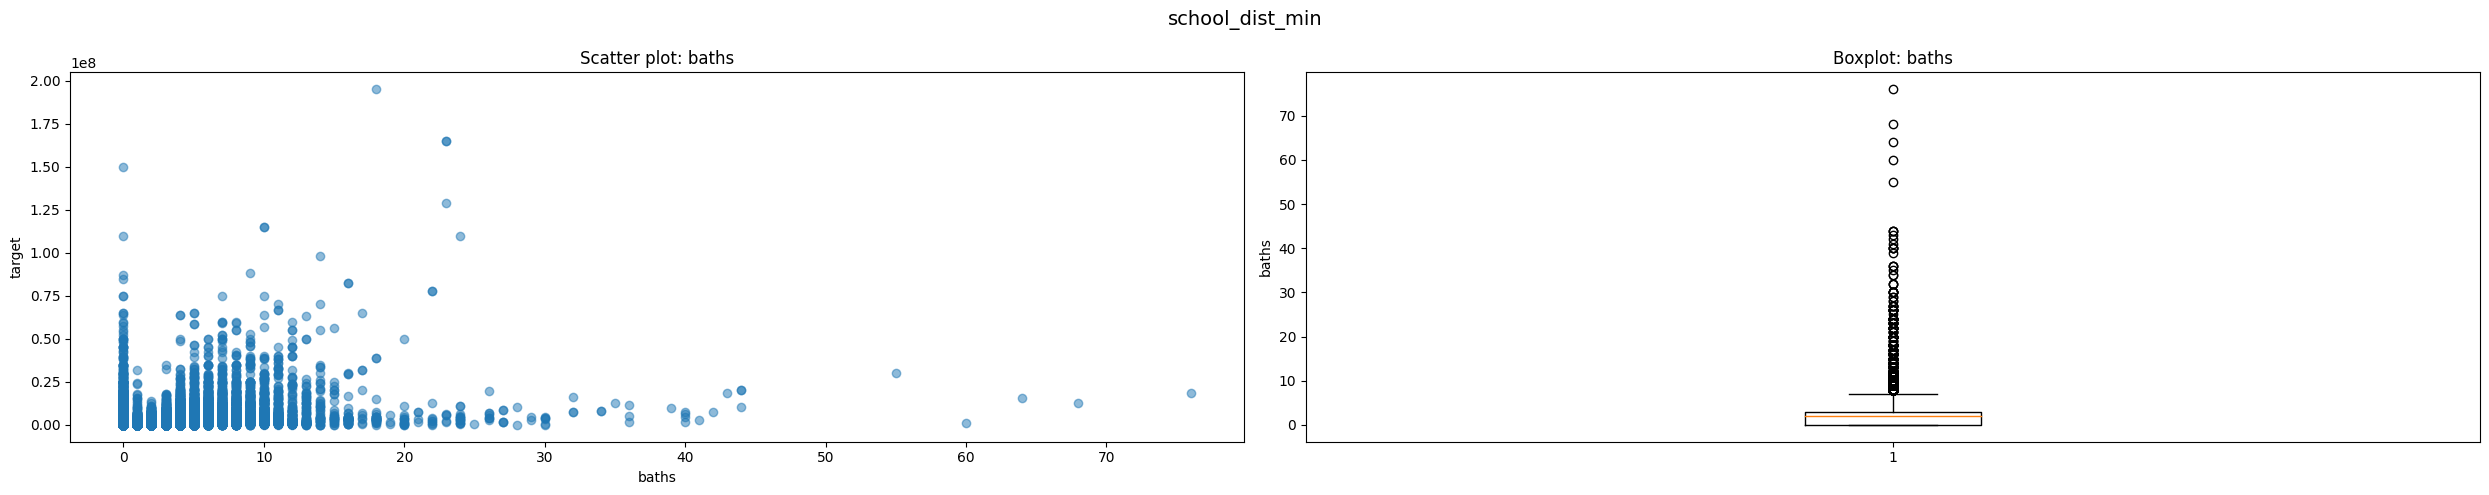

In [103]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(25, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['baths'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: baths')
barplot.set_xlabel('baths')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['baths'])
boxploot.set_title(f'Boxplot: baths')
boxploot.set_ylabel('baths')
    
plt.tight_layout()

In [104]:
df_30 = (df['baths']>30)
filtered_df = df[df_30]
display(filtered_df)
print(f"Средняя площадь объектов с более чем 30 ванными комнатами:{round(filtered_df['sqft'].mean())} sqft")
print(f"Наибольшая площадь объектов с более чем 30 ванными комнатами:{round(filtered_df['sqft'].max())} sqft")

,status,propertyType,street,baths,fireplace,city,sqft,zipcode,state,PrivatePool,target,Year built,Heating,Cooling,Parking,school_rating _mean,school_dist_min
21297,for sale,multi_family_home,2900 nw 55th ave,40.0,False,lauderhill,1100,33313,FL,True,1704000,1974,True,True,True,2.8,0.51
33247,auction,multi_family_home,443 s wilton pl,32.0,False,los angeles,19384,90020,CA,False,7580000,1957,True,True,False,6.5,0.30
51210,pending,multi_family_home,1522 s orange grove ave,35.0,False,los angeles,24307,90019,CA,False,13000000,2019,True,True,False,5.2,0.40
68882,Under Contract,multi_family_home,1336 and 1340 sheridan blvd,40.0,False,denver,16506,80214,CO,False,4500000,2019,True,True,True,2.5,0.10
79462,for sale,multi_family_home,21411 35th ave #101,76.0,False,bayside,31000,11361,NY,False,18500000,2016,False,True,False,3.8,0.07
86057,for sale,multi_family_home,443 s wilton pl,32.0,False,los angeles,19384,90020,CA,False,7580000,1957,True,False,True,6.7,1.23
97360,for sale,multi_family_home,21411 35th ave,43.0,False,flushing,22600,11361,NY,False,18500000,2019,True,False,True,3.8,0.07
99886,for sale,multi_family_home,101 harrison st,34.0,False,denver,17672,80206,CO,False,7900000,2015,True,True,True,6.3,0.43
109509,for sale,multi_family_home,77 park dr # 81,55.0,False,boston,30500,02215,MA,False,30000000,1910,False,False,False,2.5,0.20
121022,for sale,multi_family_home,40 parker hill ave #44,44.0,False,boston,21210,2120,MA,False,20000000,1910,False,False,False,-1.0,-1.00


Средняя площадь объектов с более чем 30 ванными комнатами:22469 sqft
Наибольшая площадь объектов с более чем 30 ванными комнатами:39514 sqft


Соотношение стоимость, площать, количество ванных комнат - адекватно. Ручная проверка выборочных объектов показала соответствие данных. Пока оставим их.

### 2.2 Признак sqft

Посмотрим на выбросы в параметре **sqft**:

In [105]:
outliers = ((df['sqft'] < 100)  | (df['sqft'] > 455000000))
filtered1_df = df[outliers]

filtered1_df.shape[0]

52652

Удалим явные выбросы:

In [106]:
df.drop(df[outliers].index, inplace=True)

Посмотрим на оставшиеся выбросы:

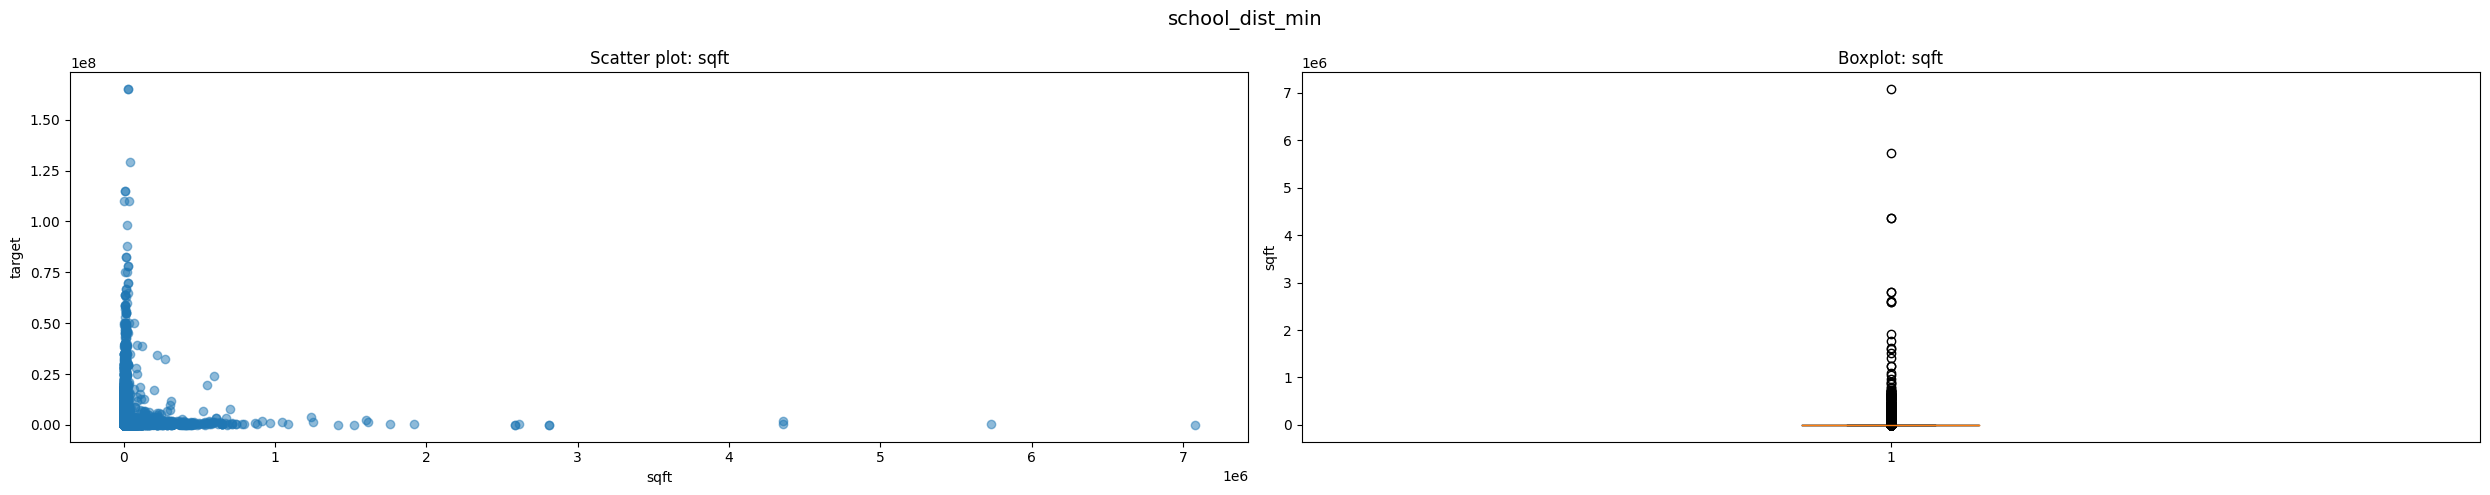

In [107]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(25, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['sqft'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: sqft')
barplot.set_xlabel('sqft')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['sqft'])
boxploot.set_title(f'Boxplot: sqft')
boxploot.set_ylabel('sqft')
    
plt.tight_layout()

In [108]:
df_30k = df[df['sqft']>30000]
df_30k.head(17)

,status,propertyType,street,baths,fireplace,city,sqft,zipcode,state,PrivatePool,target,Year built,Heating,Cooling,Parking,school_rating _mean,school_dist_min
89,for sale,condo,8470 129th st #4a,2.0,False,kew gardens,107250,11415,NY,False,319000,1969,False,False,False,5.3,0.37
133,for sale,single_family_home,20910 41st ave #3c,0.0,False,bayside,109200,11361,NY,False,270000,1963,True,False,False,3.8,0.51
197,for sale,condo,345 w 145th st #2c2,0.0,False,new york,225667,10031,NY,False,455000,1957,False,False,False,1.7,0.48
309,for sale,condo,21015 23rd ave #6b,0.0,False,bayside,373772,11360,NY,False,239000,1961,True,False,True,7.7,0.27
386,for sale,condo,6837 108th st #4f,0.0,False,forest hills,71838,11375,NY,False,440000,1939,False,False,False,3.5,0.26
562,for sale,condo,975 park ave #14b,4.0,True,new york,142075,10028,NY,False,5300000,1929,False,True,False,4.3,0.12
718,for sale,condo,3815 149th st #1l,0.0,False,flushing,114151,11354,NY,False,295000,1955,False,False,False,5.3,0.28
1703,auction,other,0 judson rd,0.0,False,san antonio,119921,78247,TX,False,89480,no info,False,False,False,6.0,0.30
2022,foreclosure,condo,240 e 55th st #8e,0.0,False,new york,32767,10022,NY,False,1282697,1963,False,False,False,5.8,0.09
2211,for sale,condo,233 e 69th st #10i,0.0,False,new york,206511,10021,NY,False,699000,1957,False,False,False,4.3,0.32


Видим, что это в основном квартиры с указаной площадью комплекса. Удалим их:

In [109]:
fo_del = (df['sqft']>30000)
df.drop(df[fo_del].index, inplace=True)

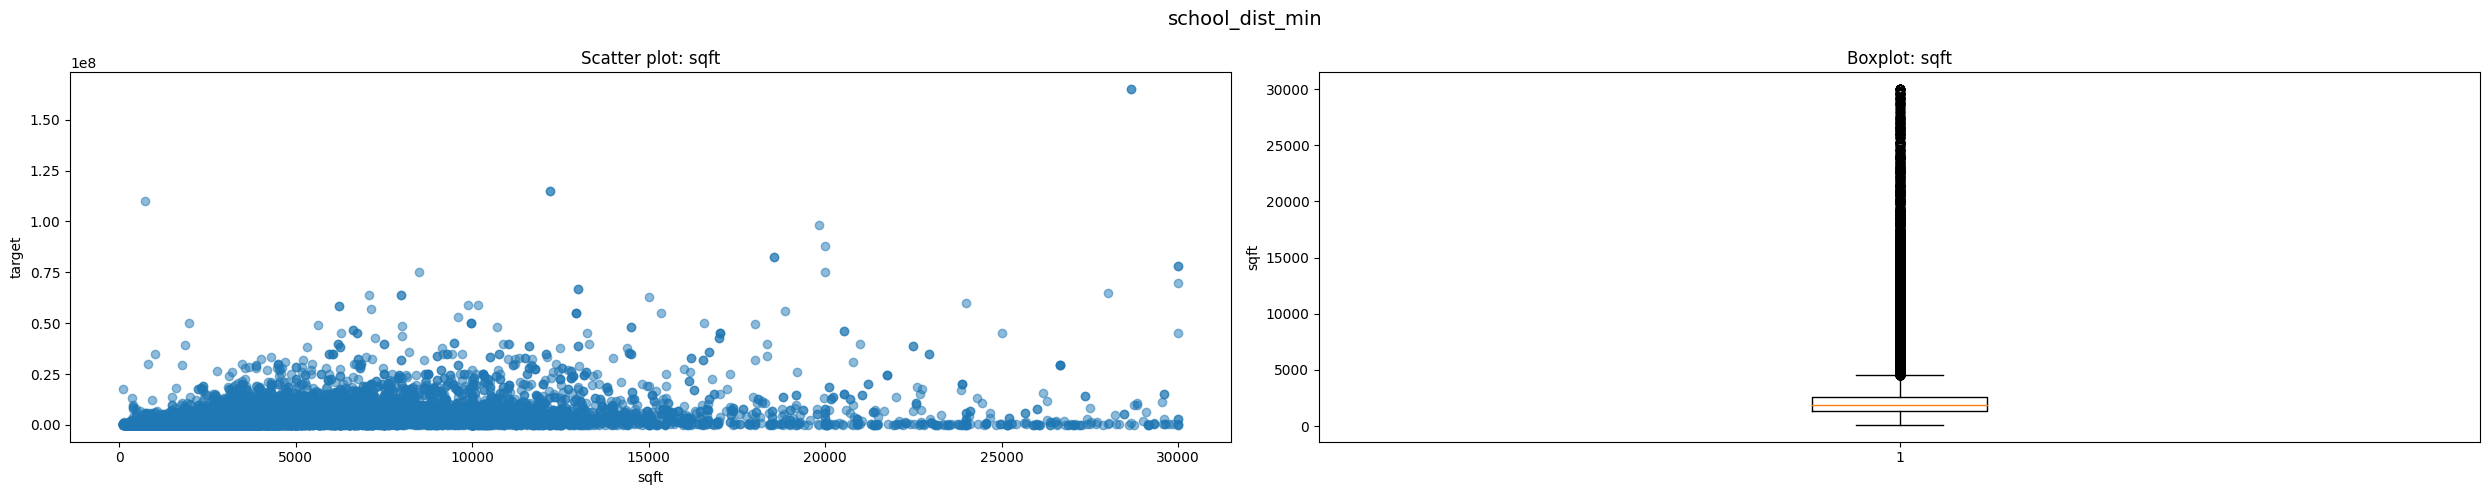

In [110]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(25, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['sqft'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: sqft')
barplot.set_xlabel('sqft')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['sqft'])
boxploot.set_title(f'Boxplot: sqft')
boxploot.set_ylabel('sqft')
    
plt.tight_layout()

### 2.3 Признак school_dist_min

Посмотрим на количество объектов с минимальным растоянием до школы более 30:

In [115]:
outliers = (df['school_dist_min'] > 30)
filtered_df = df[outliers]
filtered_df.shape[0]

1773

Таких объектов всего 10. Удалим их:

In [112]:
df.drop(df[outliers].index, inplace=True)

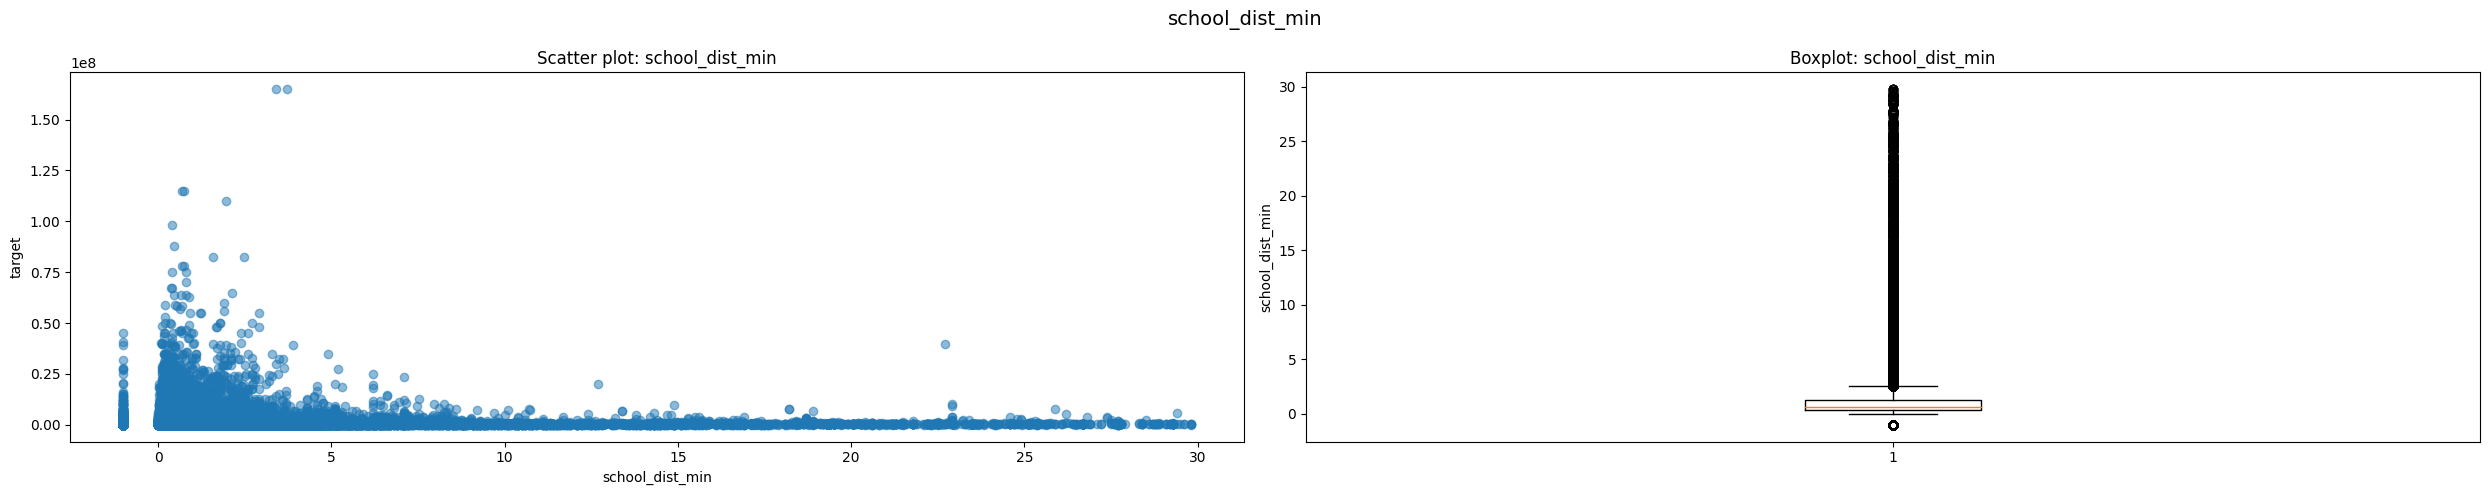

In [113]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(25, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['school_dist_min'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: school_dist_min')
barplot.set_xlabel('school_dist_min')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['school_dist_min'])
boxploot.set_title(f'Boxplot: school_dist_min')
boxploot.set_ylabel('school_dist_min')
    
plt.tight_layout()

### 2.4 Признак target

Посмотрим на выбросы в признаке: 

In [116]:
outliners = (df['target'] > 2000000)
filtered_df = df[outliners]

print(len(filtered_df))

13680


Удалим их:

In [117]:
df.drop(df[outliners].index, inplace=True)

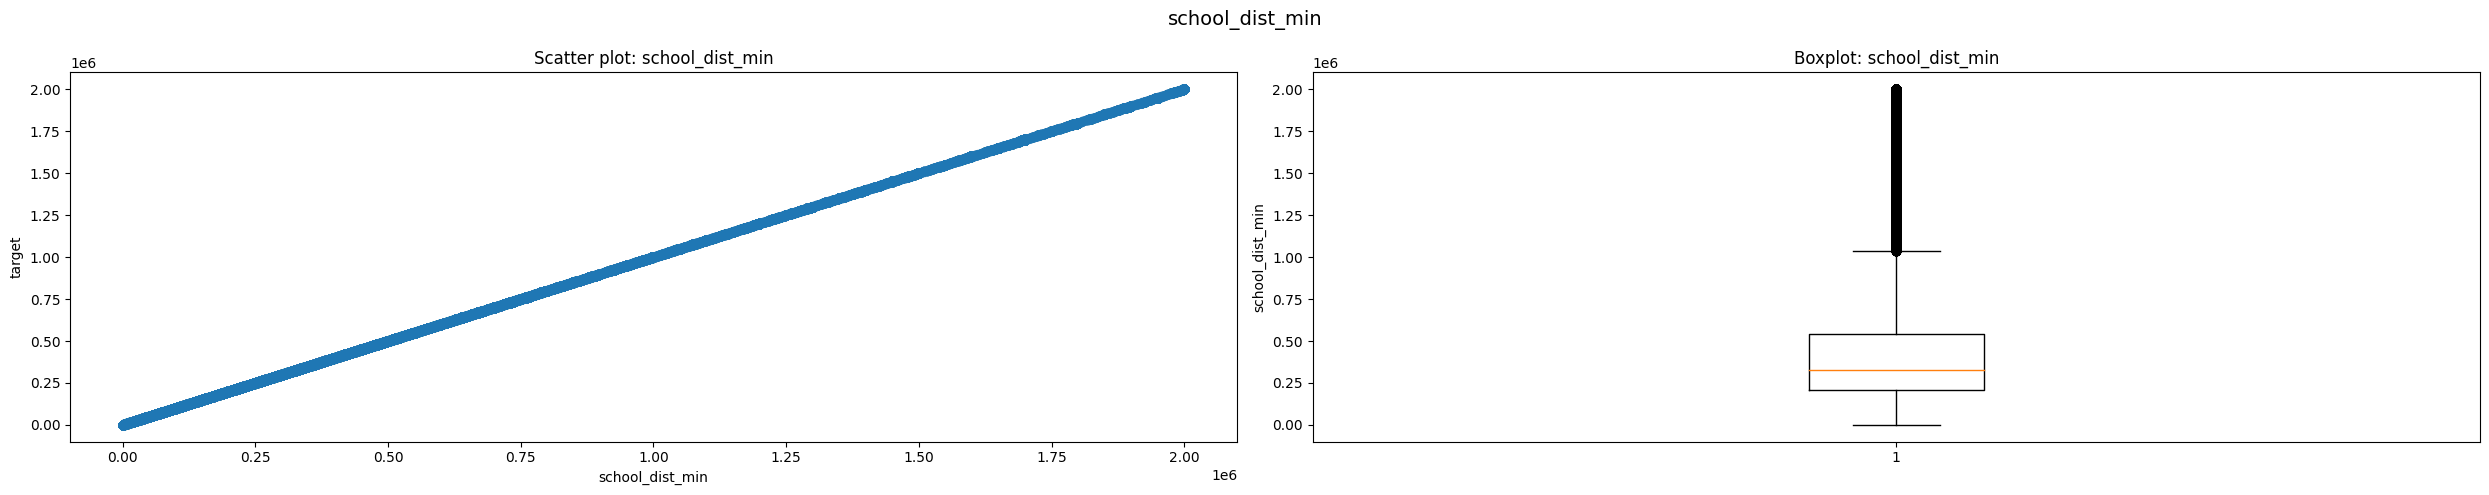

In [118]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(25, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['target'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: school_dist_min')
barplot.set_xlabel('school_dist_min')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['target'])
boxploot.set_title(f'Boxplot: school_dist_min')
boxploot.set_ylabel('school_dist_min')
    
plt.tight_layout()

### 2.5 Статистический анализ

Посмотрим на линейную регрессию числовых признаков:

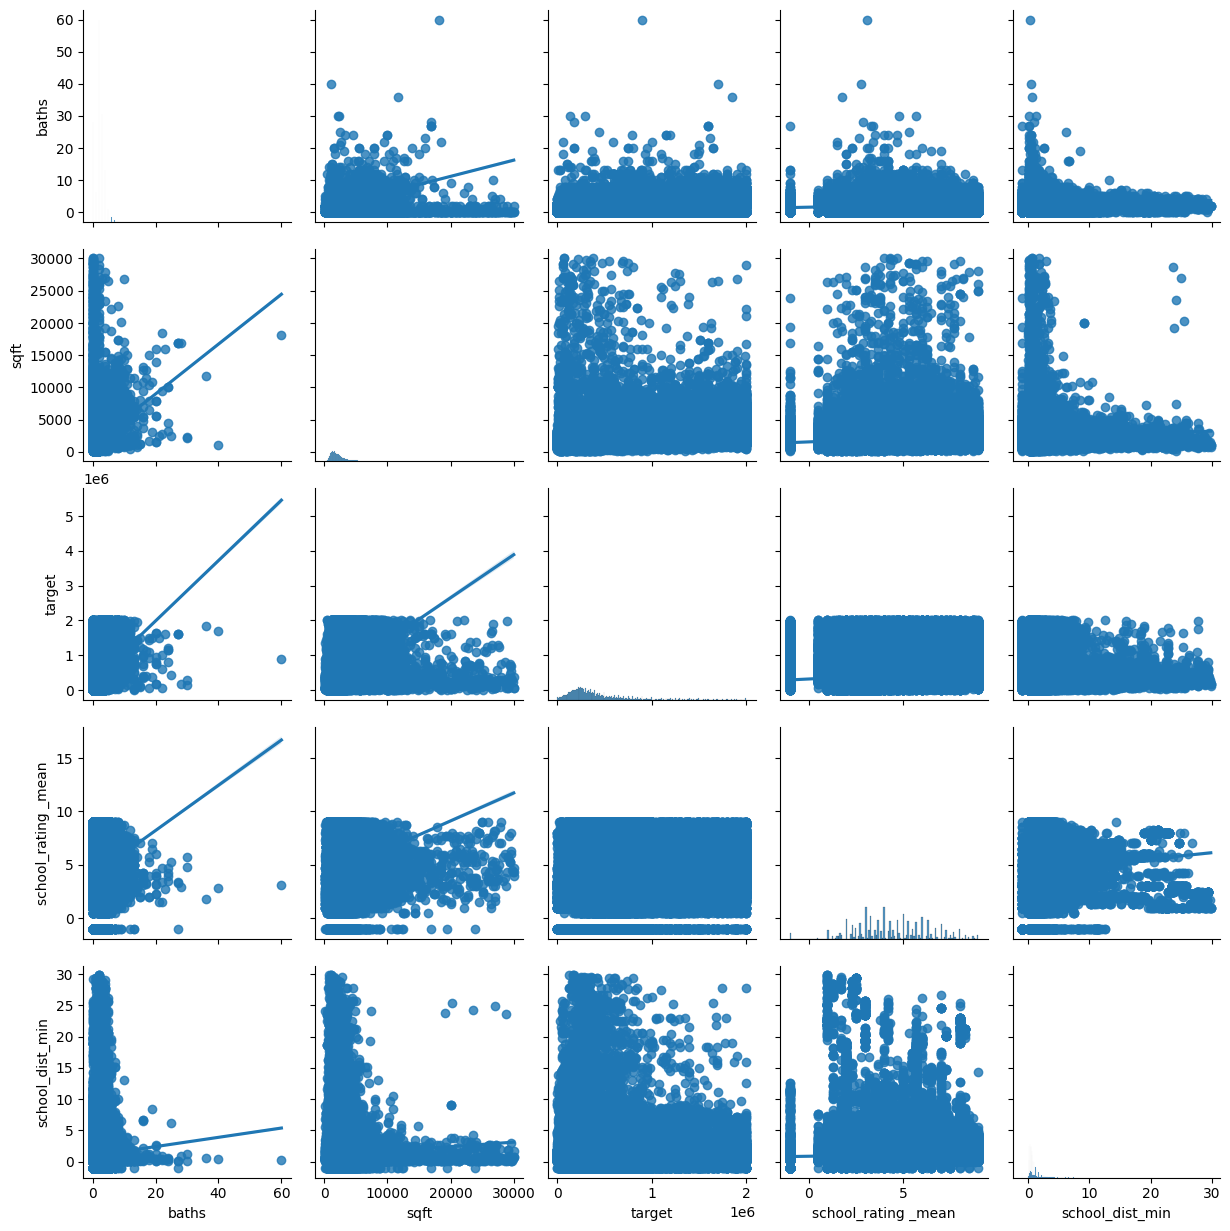

In [120]:

data_selected = df[digital_features]

sns.pairplot(data_selected, kind='reg')
plt.savefig('images/plot.png', format='png')

plt.show()


Посмотрим на нормальность числовых признаков:

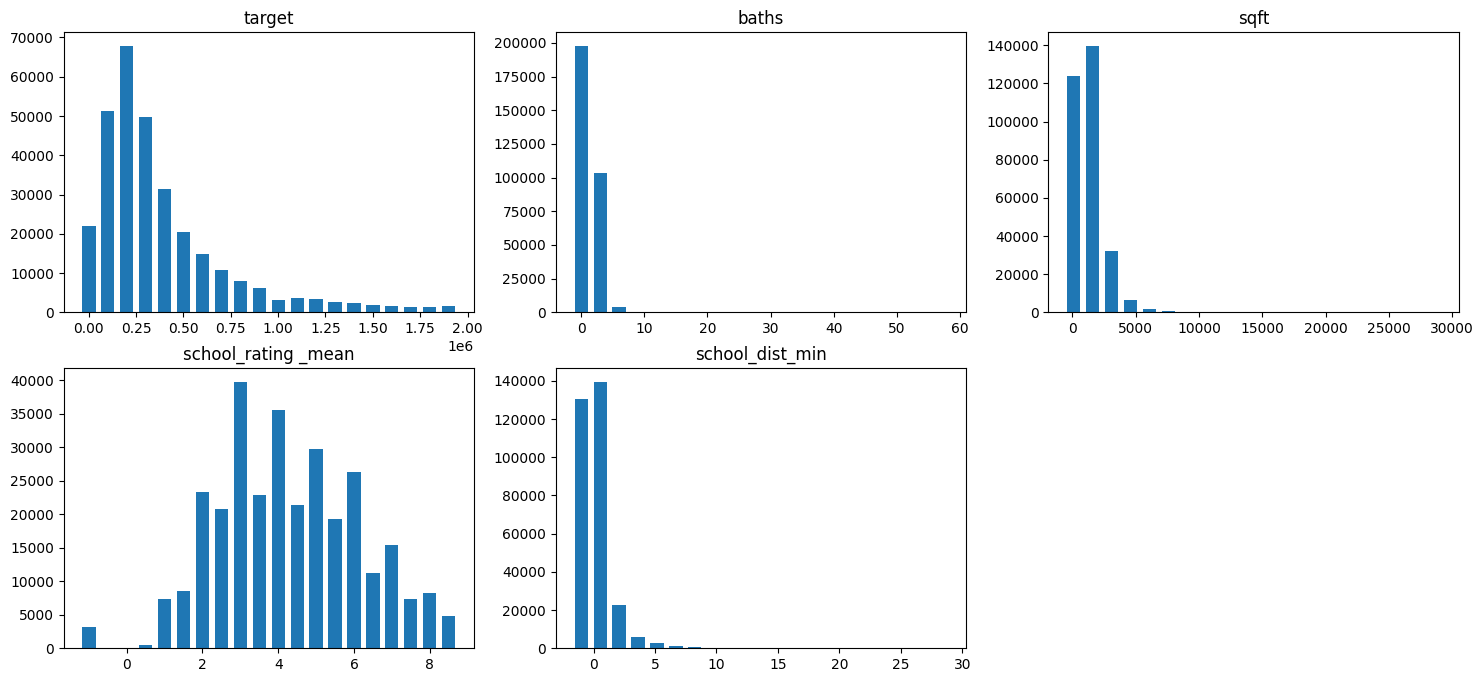

In [119]:
def visualize_distributions(titles_values_dict):
  columns = min(3, len(titles_values_dict))
  rows = (len(titles_values_dict) - 1) // columns + 1
  fig = plt.figure(figsize = (columns * 6, rows * 4))
  for i, (title, values) in enumerate(titles_values_dict.items()):
    hist, bins = np.histogram(values, bins = 20)
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.bar(bins[:-1], hist, width = (bins[1] - bins[0]) * 0.7)
    ax.set_title(title)
  plt.show()
  
visualize_distributions({'target': df['target'], 'baths': df['baths'],'sqft': df['sqft'],'school_rating _mean': df['school_rating _mean'],'school_dist_min': df['school_dist_min'],})

Проверим числовые признаки на мультиколлинеарность:

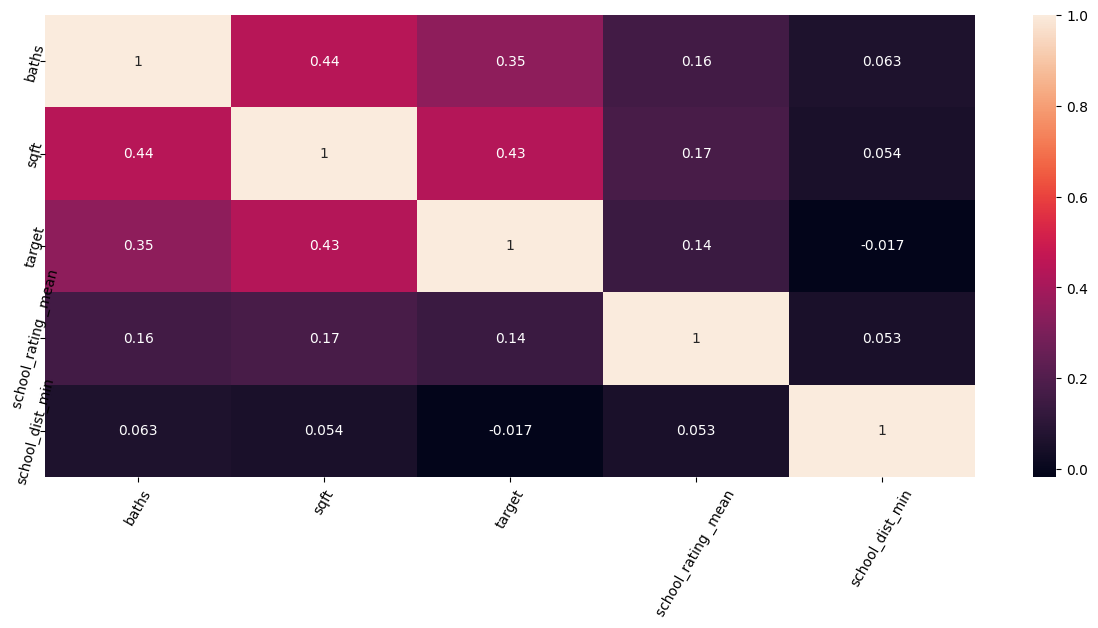

Ранг матрицы корреляций: 5
Определитель матрицы корреляций: 0.5962497


In [136]:
corr_matrix = np.corrcoef(df[digital_features], rowvar=False)

plt.figure(figsize=(15,6))

sns.heatmap(corr_matrix, annot=True)

plt.xticks(np.arange(len(df[digital_features].columns))+0.5, df[digital_features].columns, rotation=60, ha='center', fontsize=10)
plt.yticks(np.arange(len(df[digital_features].columns))+0.5, df[digital_features].columns, ha='center', fontsize=10, va='center', rotation=75)


plt.show()

print('Ранг матрицы корреляций:', np.linalg.matrix_rank(corr_matrix))
print('Определитель матрицы корреляций: {:.7f}'.format(np.linalg.det(corr_matrix)))

## 3.АНАЛИЗ БИНАРНЫХ ПРИЗНАКОВ

Посмотрим на влияние бинарных признаков на стоимость объекта:

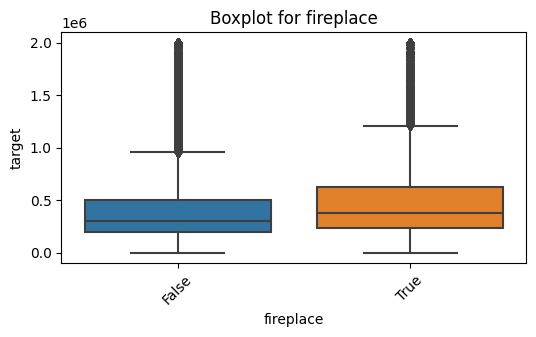

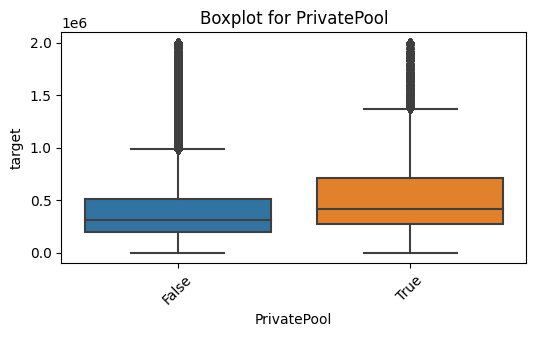

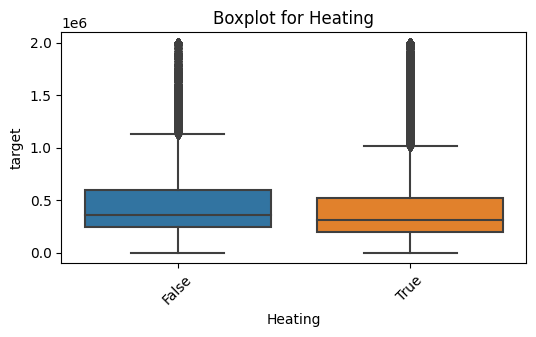

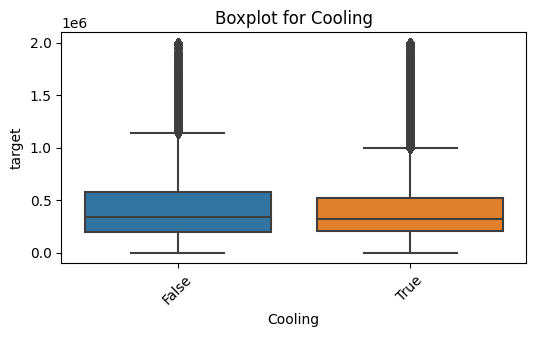

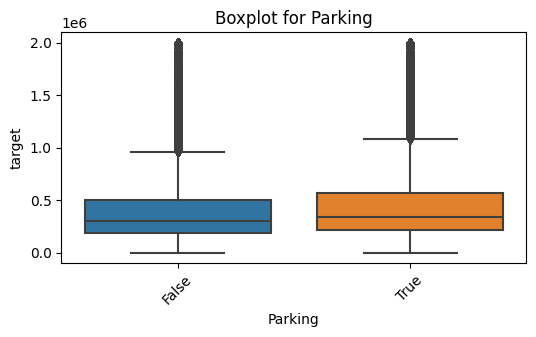

In [142]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (6, 3))
    sns.boxplot(x=column, y='target', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in chain(binar_features):
    get_boxplot(col)

Бинарные признаки влияют на стоимость.

## 4.АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

Посмотрим на влияние категориальных признаков на стоимость объекта:

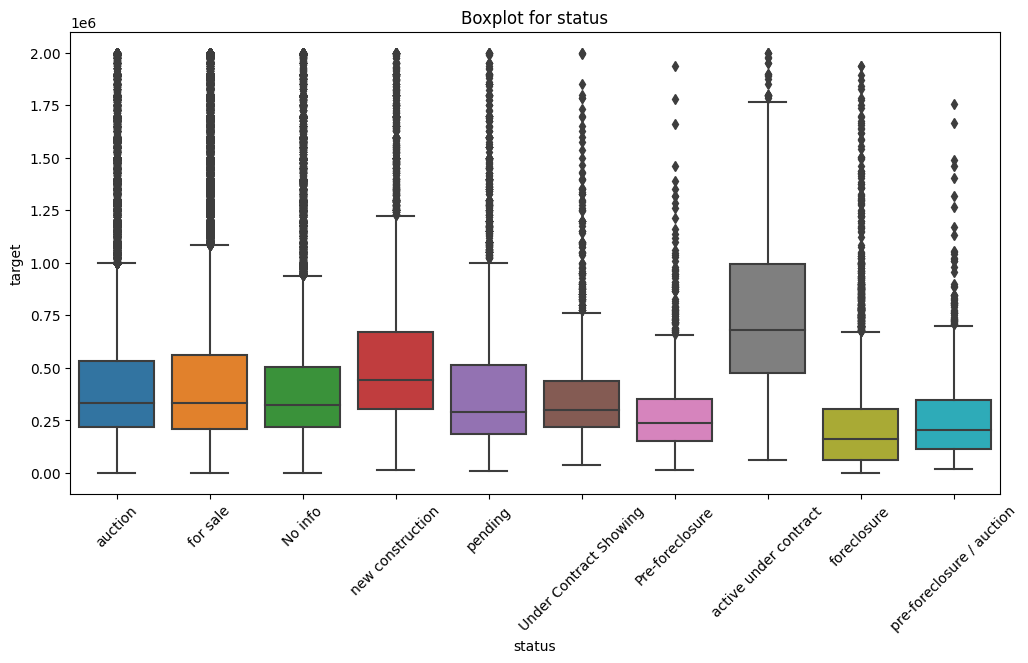

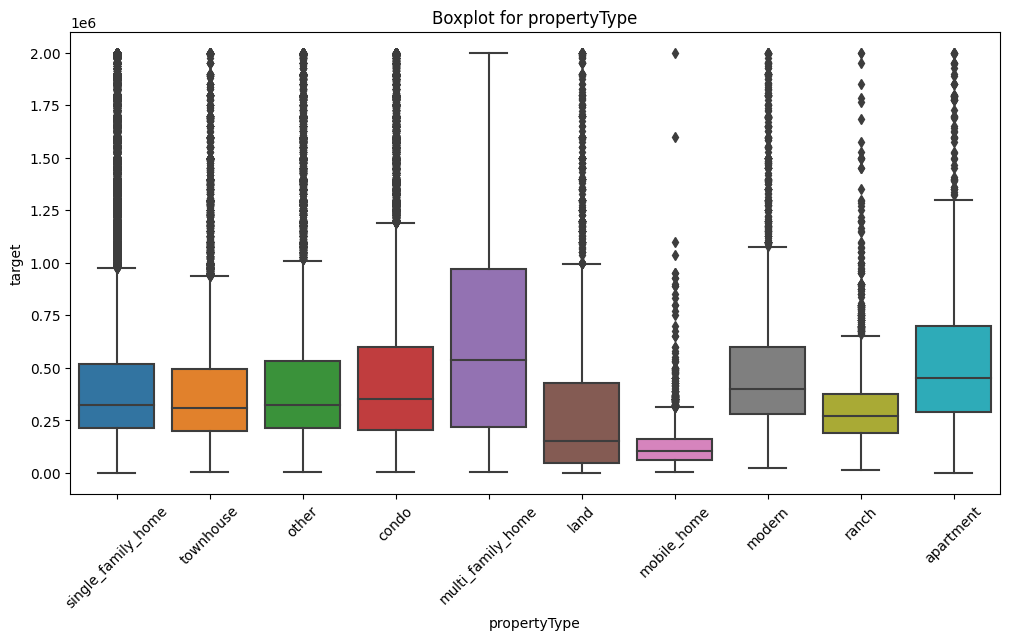

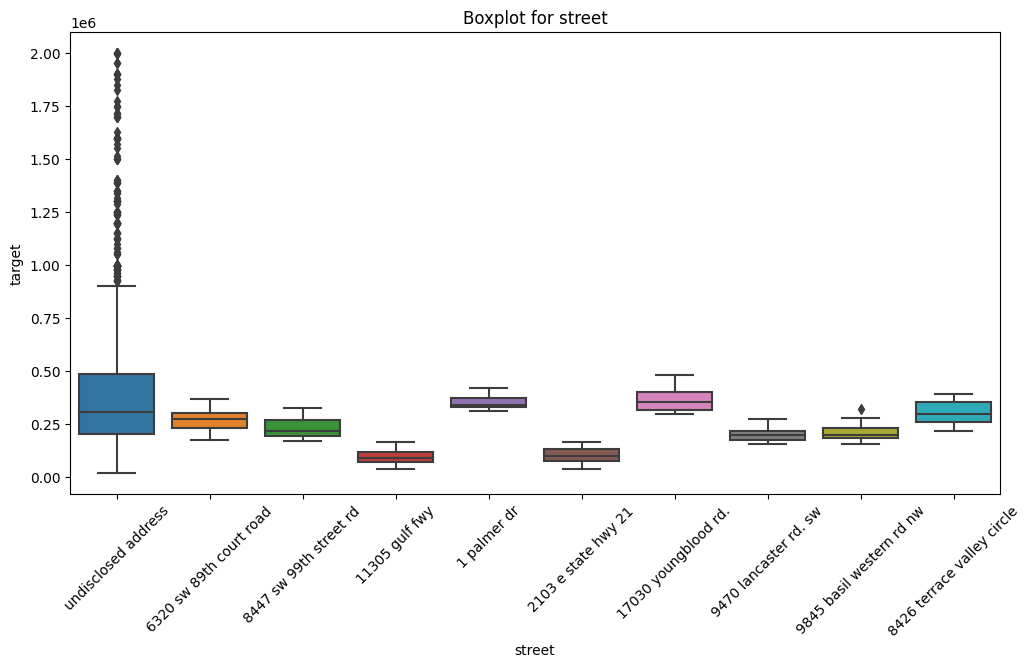

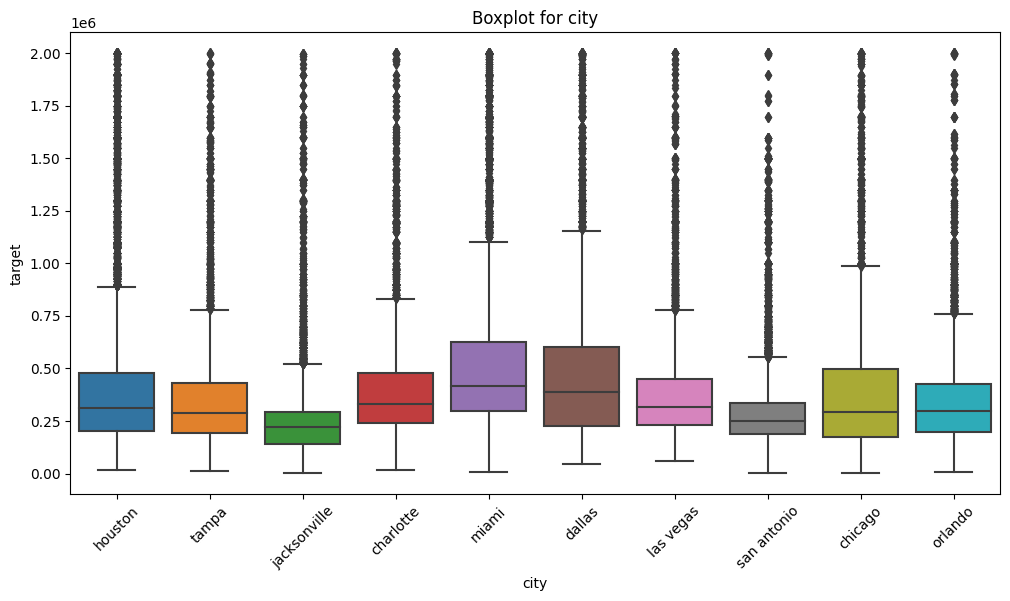

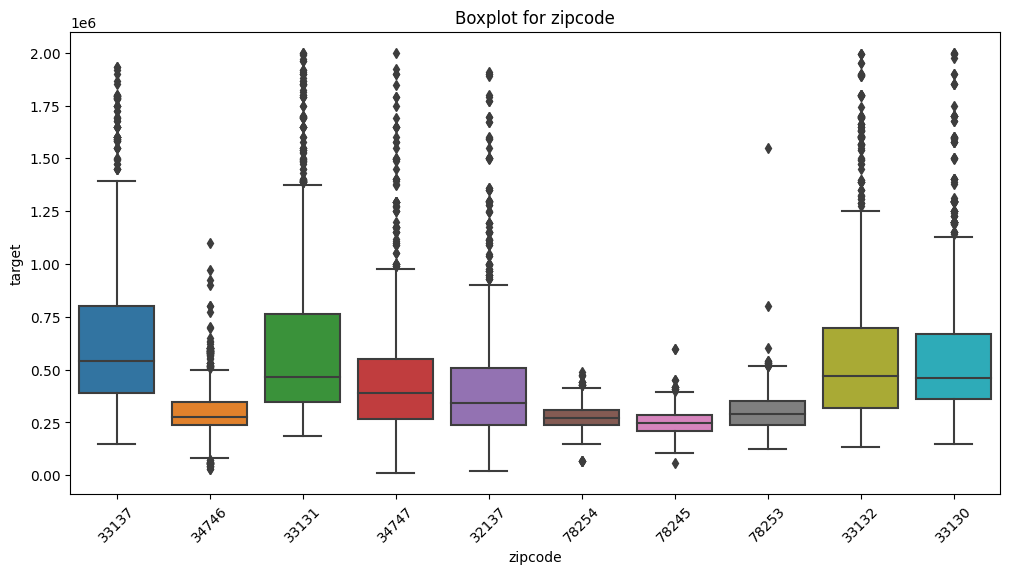

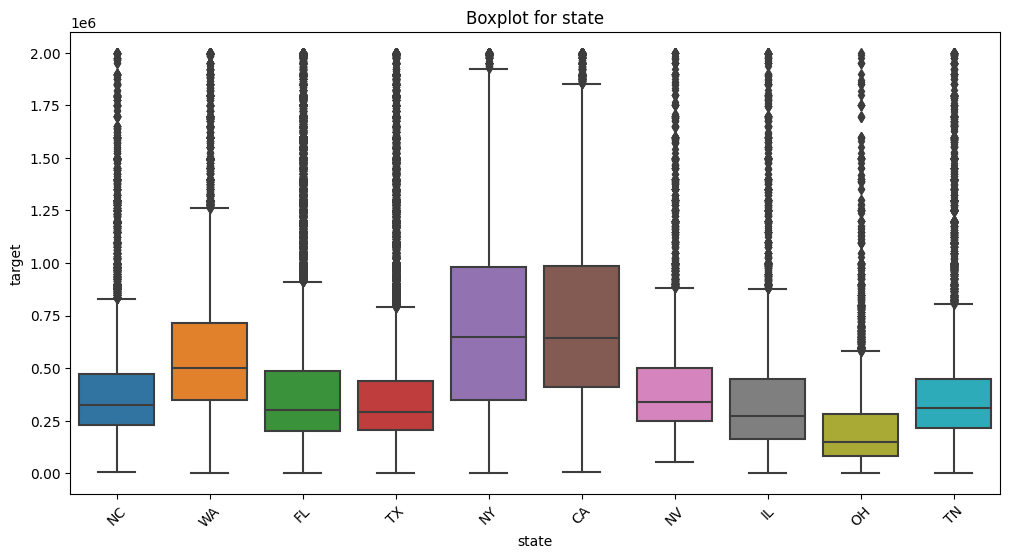

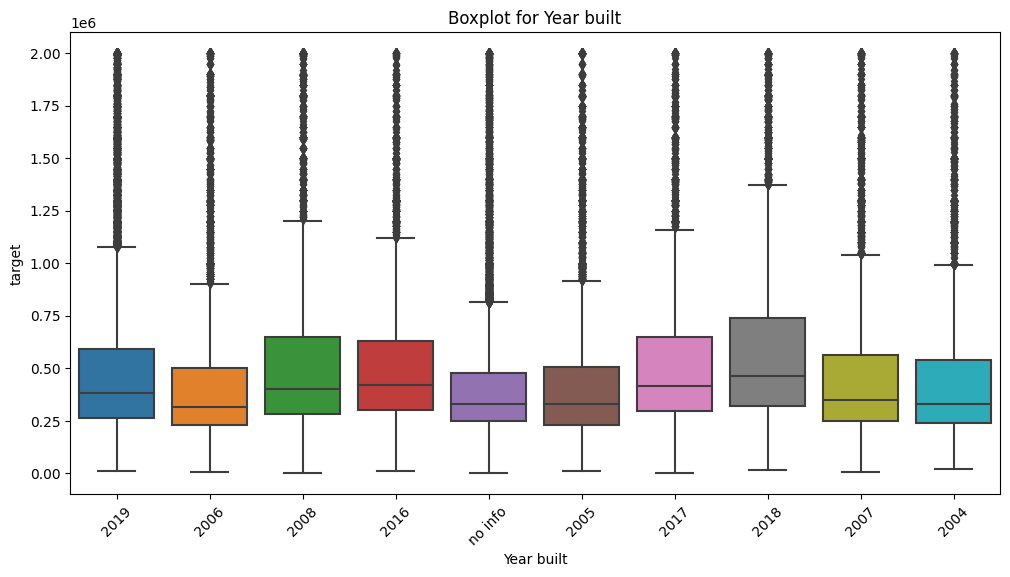

In [144]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.boxplot(x=column, y='target', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in chain(categorial_features):
    get_boxplot(col)

Категориальные признаки влияют на стоимость.

## 5. ВЛИЯНИЯ НОМИНАЛЬНЫХ ПРИЗНАКОВ НА ЦЕЛЕВОЙ ПРИЗНАК

Построим матрицу корреляции для обнаружения линейной связи между целевым признаком и предикторами, а также признаки, которые сильно закоррелированные между собой:

C:\Users\CheshirSmile\AppData\Local\Temp\ipykernel_19276\3827836902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df.corr(method='spearman'), 2), annot=True)


<AxesSubplot: >

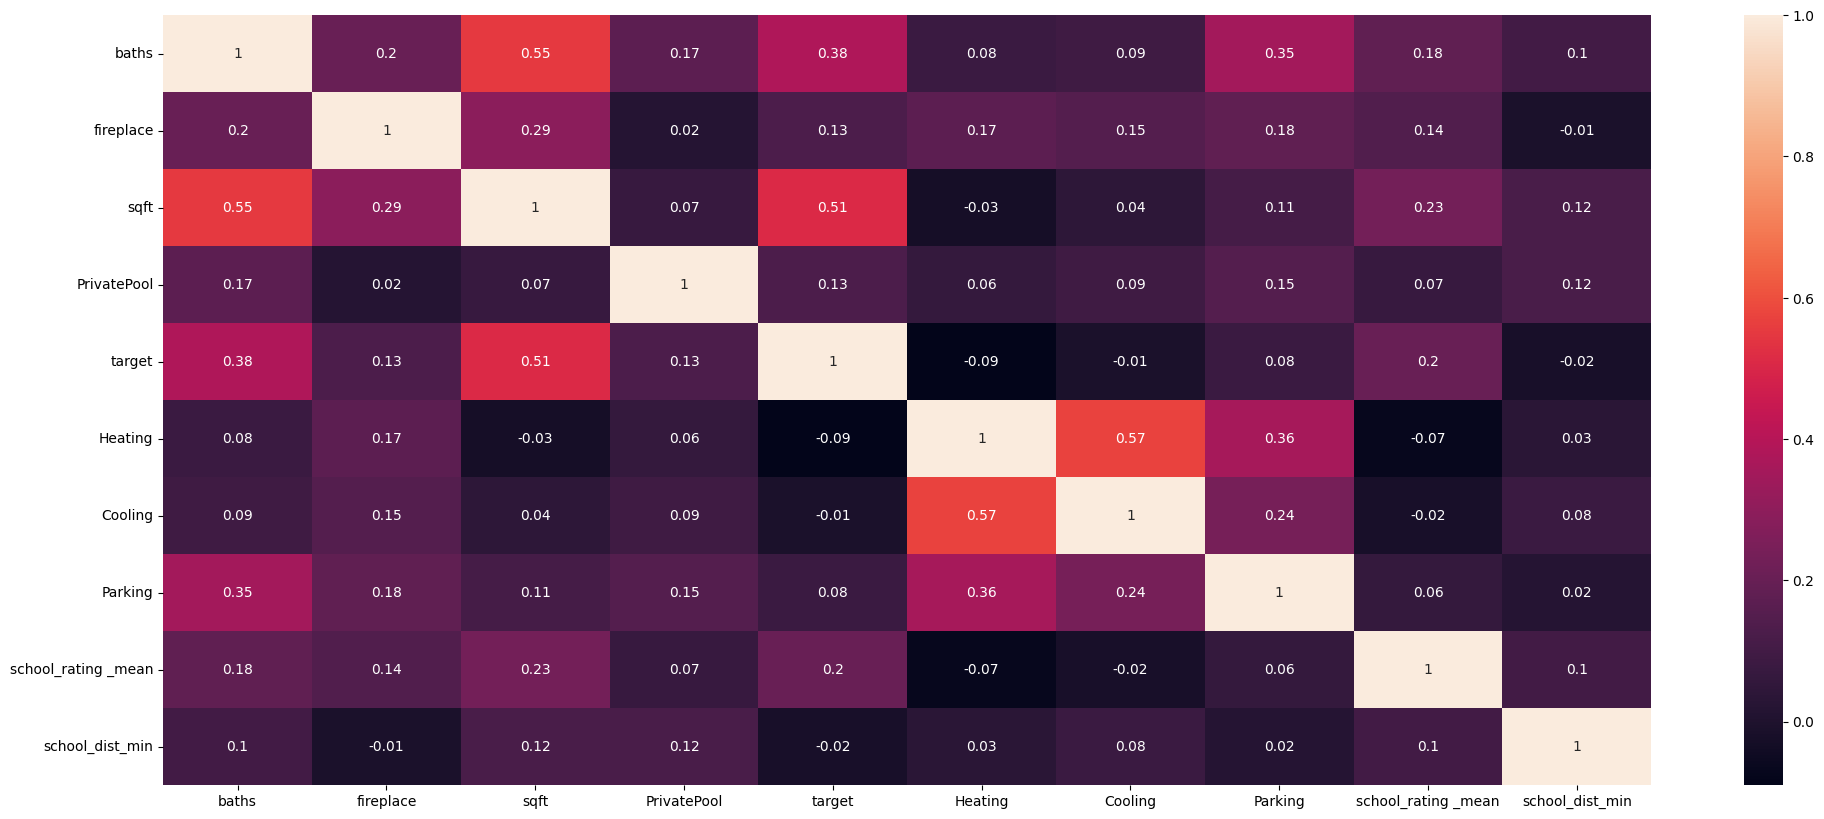

In [137]:
fig, axes = plt.subplots(figsize=(24, 10))
sns.heatmap(round(df.corr(method='spearman'), 2), annot=True)

## 6.Результаты EDA

В результате EDA мы проделали следующую работу:

* Избавились от пропусков влияющих на целевую переменную.
* Избавились от выбросов.
* Провели корреляционный анализ числовых признаков.
* Посмотрели на распределение числовых признаков, в результате решили в дальнейшем нормализовать и логорифмировать числовые признаки.
* Провели анализ номинативных переменных.


In [145]:
df.to_csv('data/data_model.csv', index=False)